# Loading Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Analysing Dataset and Feature Engineering

## Data Cleaning and Stats

In [17]:
# print % of NaN values in each column
print(df.isnull().mean()*100)

# results below indicate that only bmi column has NaN values around 4% so we can just drop those rows
df = df.dropna()
print(df.isnull().mean()*100)


id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


## Transforming text data into numerical/categorical data

In [18]:
# Check unique values in each categorical column
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
    print(f"Count of unique values: {len(df[col].unique())}\n")

# Convert binary categorical variables to numerical
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

# One-hot encode multi-category variables
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=False)

# Convert boolean columns to integers (0 and 1)
boolean_columns = df.select_dtypes(include='bool').columns
for col in boolean_columns:
    df[col] = df[col].astype(int)

# Display the transformed data
print("\nTransformed Data Sample:")
df.head()

gender: ['Male' 'Female' 'Other']
Count of unique values: 3

ever_married: ['Yes' 'No']
Count of unique values: 2

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Count of unique values: 5

Residence_type: ['Urban' 'Rural']
Count of unique values: 2

smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Count of unique values: 4


Transformed Data Sample:


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,31112,1.0,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0.0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0.0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,56669,1.0,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0


## data wrangling

Class distribution (stroke):
stroke
0    4699
1     209
Name: count, dtype: int64
Stroke percentage: 4.26%

Numerical Features Summary:
               age  avg_glucose_level         bmi
count  4908.000000        4908.000000  4908.00000
mean     42.868810         105.297402    28.89456
std      22.556128          44.425550     7.85432
min       0.080000          55.120000    10.30000
25%      25.000000          77.067500    23.50000
50%      44.000000          91.680000    28.10000
75%      60.000000         113.495000    33.10000
max      82.000000         271.740000    97.60000

Correlation with Stroke:
stroke                            1.000000
age                               0.232313
hypertension                      0.142503
avg_glucose_level                 0.138984
heart_disease                     0.137929
ever_married                      0.105051
smoking_status_formerly smoked    0.057443
work_type_Self-employed           0.055338
bmi                               0.042341
s

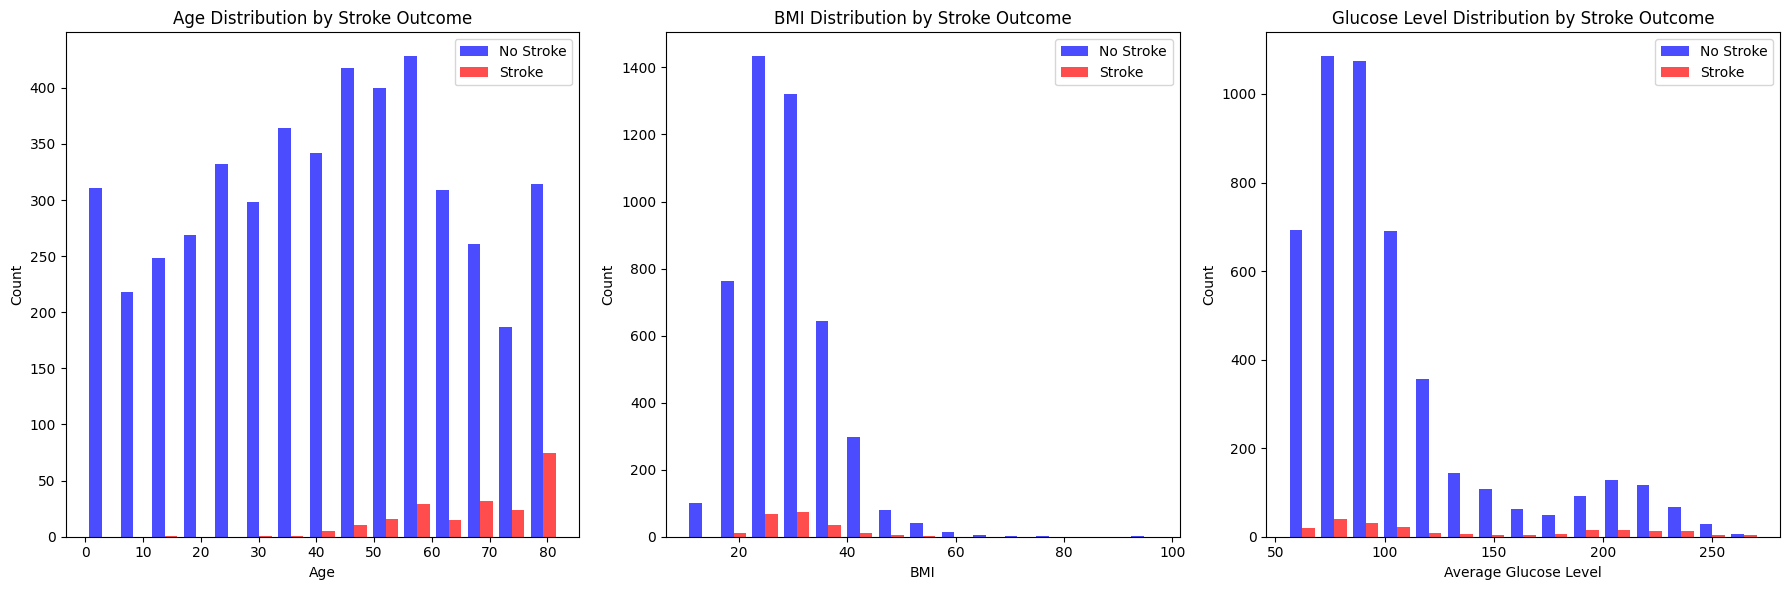


Data prepared for modeling:
X shape: (4908, 17)
y shape: (4908,)
Class balance: {0: 4699, 1: 209}


In [23]:
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis and Feature Importance

# Check class distribution (imbalance)
print("Class distribution (stroke):")
stroke_counts = df['stroke'].value_counts()
print(stroke_counts)
print(f"Stroke percentage: {stroke_counts[1]/len(df)*100:.2f}%")

# Statistical summary of numerical features
print("\nNumerical Features Summary:")
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
print(df[numerical_cols].describe())

# Correlation between features and target
print("\nCorrelation with Stroke:")
correlations = df.corr()['stroke'].sort_values(ascending=False)
print(correlations)

# Visualize feature distributions by stroke outcome
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age distribution
axes[0].hist([df[df['stroke']==0]['age'], df[df['stroke']==1]['age']], 
             bins=15, label=['No Stroke', 'Stroke'], alpha=0.7, color=['blue', 'red'])
axes[0].set_title('Age Distribution by Stroke Outcome')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

# BMI distribution
axes[1].hist([df[df['stroke']==0]['bmi'], df[df['stroke']==1]['bmi']], 
             bins=15, label=['No Stroke', 'Stroke'], alpha=0.7, color=['blue', 'red'])
axes[1].set_title('BMI Distribution by Stroke Outcome')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Count')
axes[1].legend()

# Glucose level distribution
axes[2].hist([df[df['stroke']==0]['avg_glucose_level'], df[df['stroke']==1]['avg_glucose_level']], 
             bins=15, label=['No Stroke', 'Stroke'], alpha=0.7, color=['blue', 'red'])
axes[2].set_title('Glucose Level Distribution by Stroke Outcome')
axes[2].set_xlabel('Average Glucose Level')
axes[2].set_ylabel('Count')
axes[2].legend()

plt.tight_layout()
plt.show()

# Prepare data for modeling by scaling numerical features

# Select features and target
# drop NA
df = df.dropna()
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nData prepared for modeling:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Class balance: {y.value_counts().to_dict()}")

## k-fold Classification

K-Fold Cross-Validation Results:

Random Forest:
  Mean ROC AUC = 0.7861 (STD: 0.0164)
  Mean Accuracy = 0.9562 (STD: 0.0085)
  Mean Precision = 0.0000 (STD: 0.0000)

Gradient Boosting:
  Mean ROC AUC = 0.8268 (STD: 0.0142)
  Mean Accuracy = 0.9550 (STD: 0.0091)
  Mean Precision = 0.0786 (STD: 0.1020)

Logistic Regression:
  Mean ROC AUC = 0.8417 (STD: 0.0115)
  Mean Accuracy = 0.7453 (STD: 0.0087)
  Mean Precision = 0.1211 (STD: 0.0262)

SVM:
  Mean ROC AUC = 0.7994 (STD: 0.0298)
  Mean Accuracy = 0.7771 (STD: 0.0149)
  Mean Precision = 0.1180 (STD: 0.0268)

KNN:
  Mean ROC AUC = 0.6188 (STD: 0.0227)
  Mean Accuracy = 0.9560 (STD: 0.0084)
  Mean Precision = 0.1833 (STD: 0.1528)

Checking for NaN values in training data:
gender                            0.0
age                               0.0
hypertension                      0.0
heart_disease                     0.0
ever_married                      0.0
Residence_type                    0.0
avg_glucose_level                 0.0
bmi

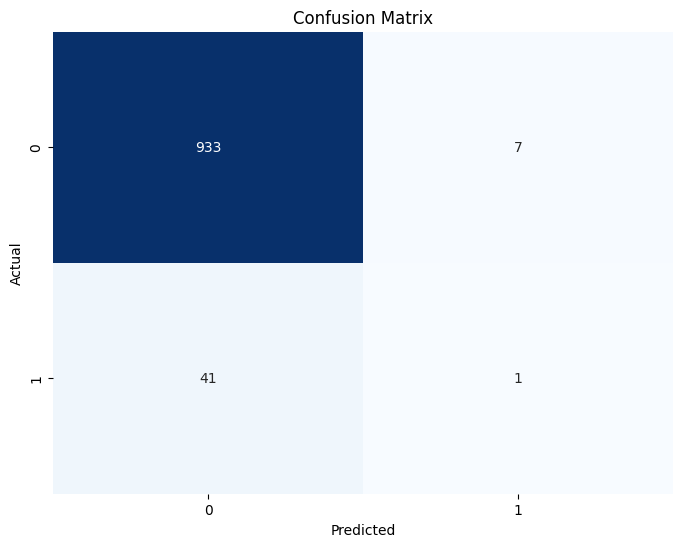

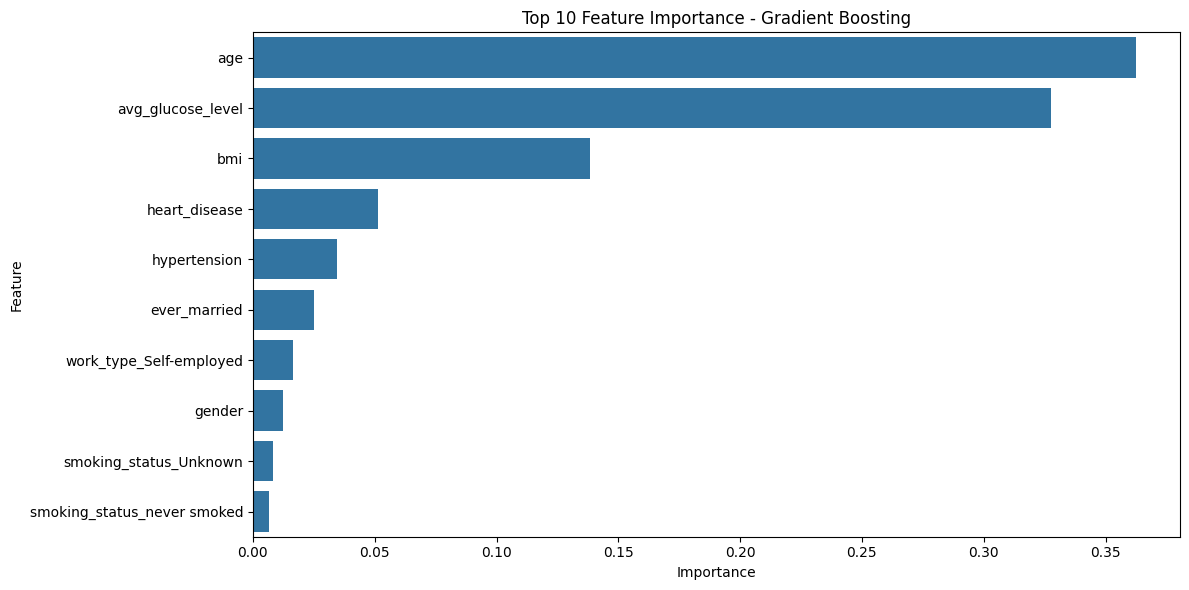

In [25]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Perform k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_results = {}
cv_accuracy = {}
cv_precision = {}

print("K-Fold Cross-Validation Results:")
for name, classifier in classifiers.items():
    # ROC AUC
    auc_scores = cross_val_score(classifier, X, y, cv=kf, scoring='roc_auc')
    cv_results[name] = auc_scores
    
    # Accuracy
    acc_scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
    cv_accuracy[name] = acc_scores
    
    # Precision
    prec_scores = cross_val_score(classifier, X, y, cv=kf, scoring='precision')
    cv_precision[name] = prec_scores
    
    print(f"\n{name}:")
    print(f"  Mean ROC AUC = {auc_scores.mean():.4f} (STD: {auc_scores.std():.4f})")
    print(f"  Mean Accuracy = {acc_scores.mean():.4f} (STD: {acc_scores.std():.4f})")
    print(f"  Mean Precision = {prec_scores.mean():.4f} (STD: {prec_scores.std():.4f})")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# print num of NaN values in each column
print("\nChecking for NaN values in training data:")
print(X_train.isnull().mean()*100)

# Train the best model (assuming it's Gradient Boosting based on cross-validation)
best_clf = GradientBoostingClassifier(random_state=42)
best_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_clf.predict(X_test)
y_prob = best_clf.predict_proba(X_test)[:, 1]

# Evaluate model
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance for Gradient Boosting
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance[:10])
plt.title('Top 10 Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.show()